[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/atmos-cloud-sim-uj/PyMPDATA.git/master?filepath=PyMPDATA_examples/advection_in_3d_as_in_Smolarkiewicz_1984_Figs_13-14/demo.ipynb)    
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/atmos-cloud-sim-uj/PyMPDATA/blob/master/PyMPDATA_examples/advection_in_3d_as_in_Smolarkiewicz_1984_Figs_13-14/demo.ipynb)    

In [ ]:
# 3D example as in:
# - Smolarkiewicz 1984, Figs 13-14
# - Smolarkiewicz and Szmelter 2005
# - Jaruga et al. 2015, Fig. 13
#   (https://github.com/igfuw/libmpdataxx/blob/master/tests/paper_2015_GMD/4_revolving_sphere_3d)

In [ ]:
import os, sys
if 'google.colab' in sys.modules:
    %cd /content
    if not os.path.isdir('PyMPDATA'):
        !git clone --depth 1 https://github.com/atmos-cloud-sim-uj/PyMPDATA.git
        %cd PyMPDATA
    else:
        %cd PyMPDATA
        !git pull
    !pip install -r requirements.txt
    !ldconfig

In [1]:
import os, sys
if 'google.colab' in sys.modules:
    %cd /content/PyMPDATA
else:
    sys.path.insert(0, os.path.join(os.getcwd(), '../..'))

In [12]:
import numpy as np
from matplotlib import pyplot
from PyMPDATA import ScalarField, VectorField, Options, ConstantBoundaryCondition
from PyMPDATA_examples.utils.show_plot import show_plot

In [3]:
options = Options()

In [4]:
x, y, z = 0, 1, 2

nt = 556
nx = 59 # TODO

grid = (nx, nx, nx)

dt = 0.018 * 2 * np.pi
L = 100
dx = L / (nx - 1) # TODO
dy = dx
dz = dx
h = 4
r = 15
d = 25 / np.sqrt(3)
x0 = 50 - d
y0 = 50 + d
z0 = 50 + d
  
# TODO: open boundaries in all dims

# // sphere shape
#   decltype(slv.advectee()) tmp(slv.advectee().extent());
#   tmp.reindexSelf(slv.advectee().base());
#   tmp =   blitz::pow(i * dx - x0, 2)
#         + blitz::pow(j * dx - y0, 2)
#         + blitz::pow(k * dx - z0, 2);
#   slv.advectee() = where(tmp - pow(r, 2) <= 0, h, 0);

In [5]:
bcs = tuple([ConstantBoundaryCondition(np.nan) for _ in grid])

In [6]:
grid = (10, 10, 10)

data = np.zeros(grid)
data[0:10,5:10,5:10] = 1
advectee = ScalarField(data, halo=options.n_halo, boundary_conditions=bcs)

In [7]:
# TODO: plot initial field?

In [8]:
omega = 0.1
xc = 50
yc = 50
zc = 50

#   // constant angular velocity rotational field
#   slv.advector(x) = omega / sqrt(3) * (-(j * dy - yc) + (k * dz - zc)) * dt / dx
#   slv.advector(y) = omega / sqrt(3) * ( (i * dx - xc) - (k * dz - zc)) * dt / dy
#   slv.advector(z) = omega / sqrt(3) * (-(i * dx - xc) + (j * dy - yc)) * dt / dz

In [9]:
# TODO: quiver 3d

In [10]:
#solver.advance(nt=nt)

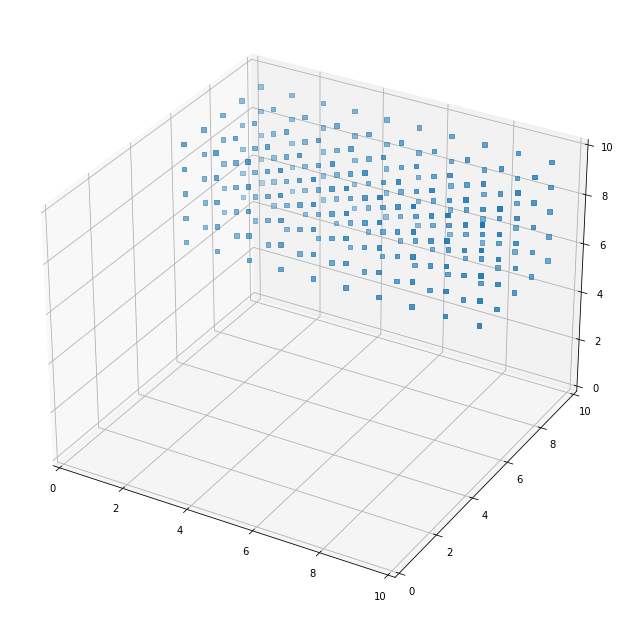

HTML(value="<a href='../utils/temporary_files/tmp3k38mc7y.pdf' target='_blank'>../utils/temporary_files/tmp3k3…

In [13]:
fig = pyplot.figure(figsize=(24, 12))
ax = fig.add_subplot(121, projection='3d')
where = advectee.get() > .5
x, y, z = np.mgrid[0:grid[0], 0:grid[1], 0:grid[2]]
ax.scatter(x[where]+.5, y[where]+.5, z[where]+.5, advectee.get(), marker='s')

ax.set_xlim(0, grid[0])
ax.set_ylim(0, grid[1])
ax.set_zlim(0, grid[2])
show_plot()